In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [9]:
result_file = './mri_results/checkpoint.pt'
cont = torch.load(result_file)
print(cont.keys())
gt_img = cont['gt_img']
recon = cont['recon']
adj_img = cont['adj_img']

dict_keys(['gt_img', 'recon', 'adj_img', 'nrmse', 'ssim'])


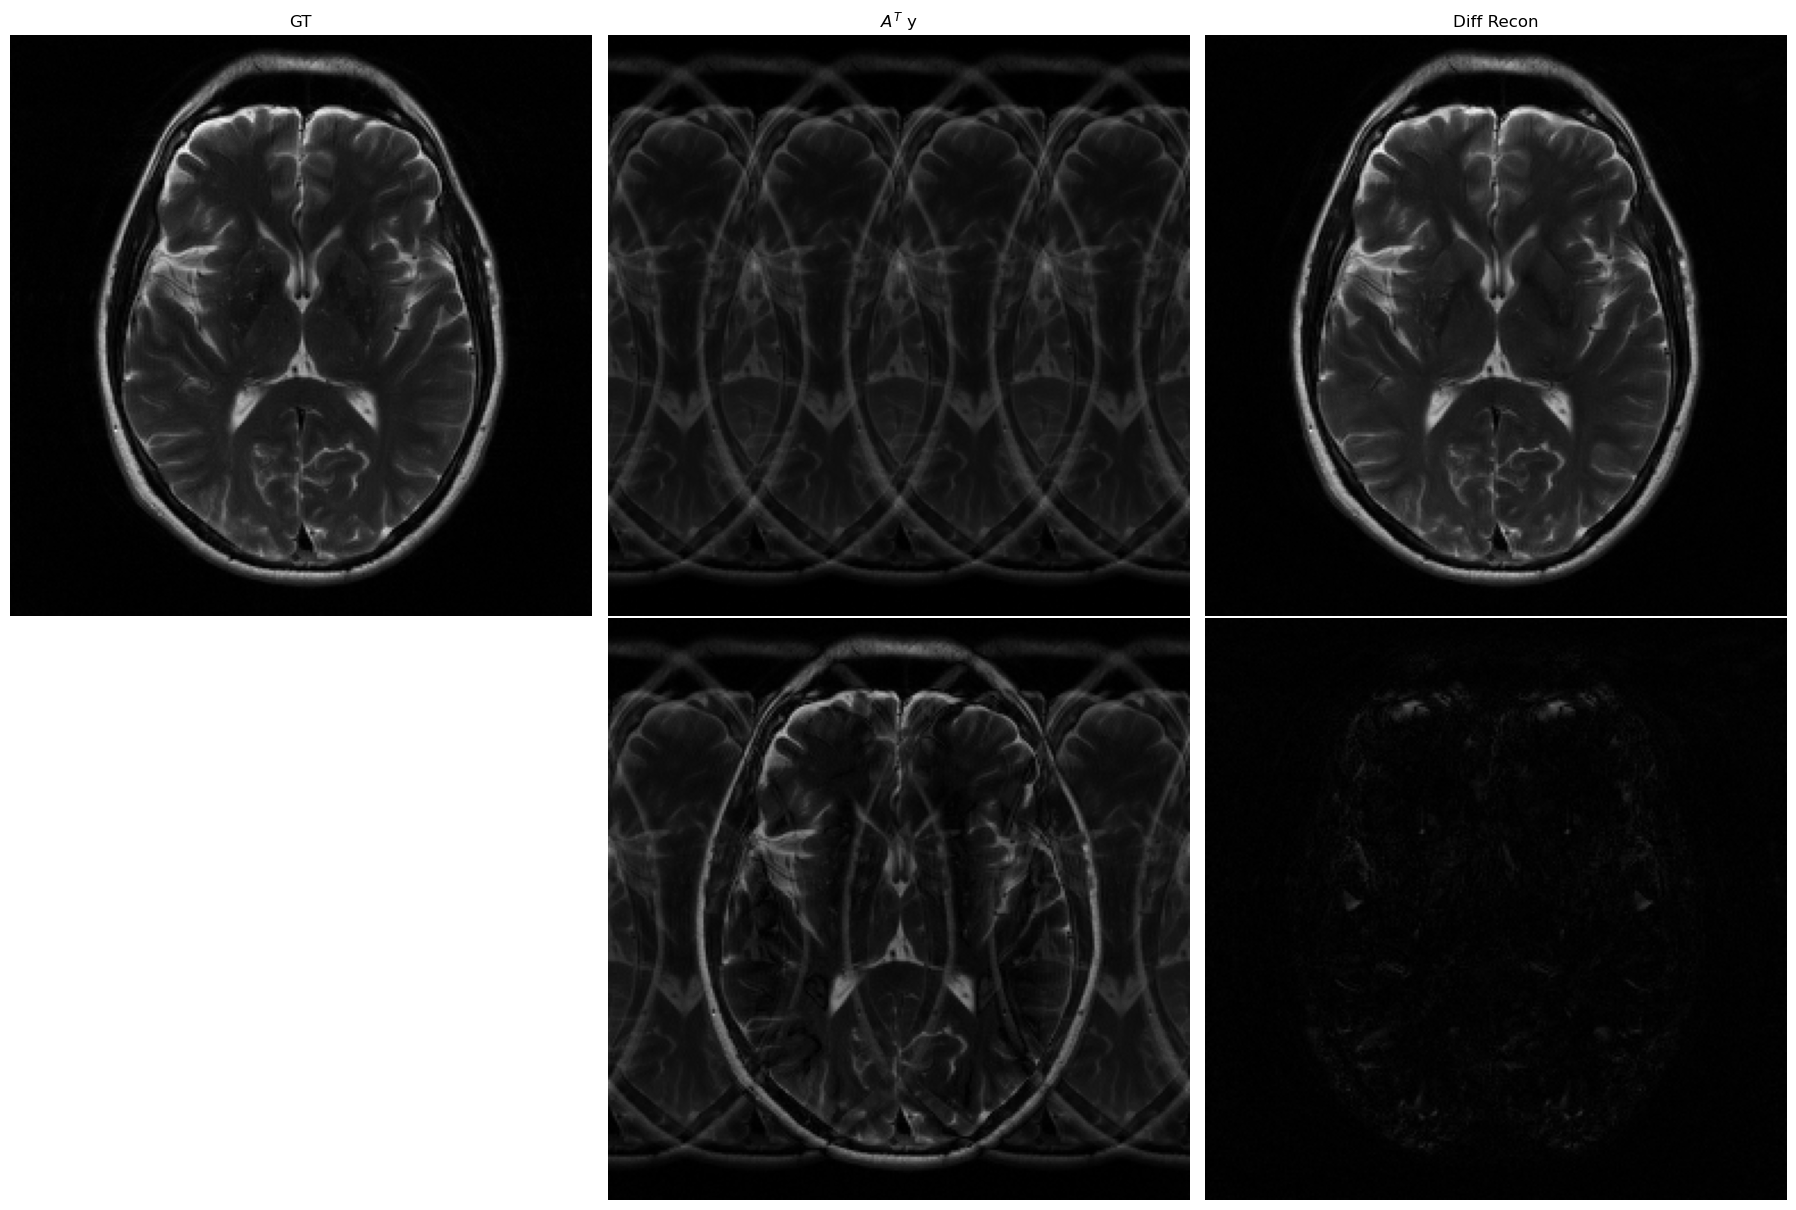

In [10]:
vmin = 0
vmax = 1.0
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
plt.title('GT')
plt.imshow(np.flipud(abs(gt_img[0,0])), cmap='gray',vmin = vmin, vmax = vmax)
plt.axis('off')
plt.subplot(2,3,2)
plt.title('$A^T$ y')
plt.imshow(np.flipud(abs(adj_img[0,0])),cmap='gray',vmin = vmin, vmax = vmax)
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(np.flipud(abs(gt_img[0,0]-adj_img[0,0])),cmap='gray',vmin = vmin, vmax = vmax)
plt.axis('off')
plt.subplot(2,3,3)
plt.title('Diff Recon')
plt.imshow(np.flipud(abs(recon[0,0])),cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(np.flipud(abs(gt_img[0,0]-recon[0,0])),cmap='gray',vmin = vmin, vmax = vmax)
plt.axis('off')
plt.tight_layout(pad=0.5)